#**Entrada dos Dados**

In [1]:
# Imports Necessários
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
dataset_train.shape

(1258, 6)

#**Pré-Processo**

In [6]:
# Separar a coluna open, coverte para numpy
traning_set = dataset_train.iloc[:, 1:2].values
traning_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [7]:
# Normalizaçao entre zero e um
sc = MinMaxScaler(feature_range=(0,1))
traning_set_scaled = sc.fit_transform(traning_set)
traning_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
# Prepara variáveis
# Redimensionar a analise das amostras( primeiro a camada amostras, posteriormente as demais)
# x contém amostras, cada amostra contém 60 valores, 1198 amostras (1258 - 60)
# y contém o dia seguinte
x_train = []
y_train = []

for i in range(60, 1258):
  x_train.append(traning_set_scaled[i-60:i, 0])
  y_train.append(traning_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [11]:
print(x_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [12]:
# Redimensiona camadas faltantes
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1198, 60, 1)

#**Cria Rede LSTM**

In [14]:
# Rede LSTM

Model = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

In [15]:
# Compila Modelo
Model.compile(optimizer='adam', loss='mean_squared_error')
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=30)

In [16]:
#Treina Modelo
Model.fit(x_train, y_train, epochs=500, batch_size=32, callbacks=[es])

Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - loss: 0.0995
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0070
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0060
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0051
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0053
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0044
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0048
Epoch 8/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0047
Epoch 9/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0042
Epoch 10/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.0048
Epoch 11/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0051
Epoch 12/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0039
Epoch 13/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0042
Epoch 14/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0037
Epoch 15/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 

#**Previsão**

In [17]:
# Entra dados de teste
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
# Junta dados de treino e teste na mesma série
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [19]:
# Pega os 60 dias anteriores do periodo de previsão
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [20]:
# Transforma em formato 2d
inputs = inputs.reshape(-1, 1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [21]:
# Aplica a mesma normalização
inputs = sc.transform(inputs)

In [22]:
# Aplicando a mesma lógica do treino para os testes aplicando invés de 60 para 20 dias
x_test = []
for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])

# Converte para Numpy
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
# Faz as previsões
predicted_stock_price = Model.predict(x_test)

#Desnormaliza
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


#**Visualizaçao Gráfica**

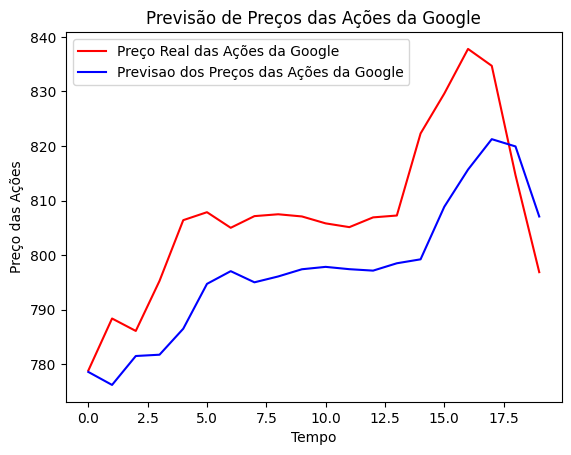

In [24]:
# Plotar os Gráficos
plt.plot(real_stock_price, color='red', label='Preço Real das Ações da Google')
plt.plot(predicted_stock_price, color='blue', label='Previsao dos Preços das Ações da Google')
plt.title('Previsão de Preços das Ações da Google')
plt.xlabel('Tempo')
plt.ylabel('Preço das Ações')
plt.legend()
plt.show()